In [1]:
%matplotlib inline

from cosima_cookbook import build_index, get_nc_variable
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import dask.diagnostics

starting distributed client...
<Client: scheduler='tcp://127.0.0.1:37589' processes=8 cores=8>


build_index()

In [2]:
expts = ['mom025_nyf','mom025_nyf_salt','mom025_jra_ryf8485',
         'mom025_jra_ryf9091','mom025_jra_ryf0304','mom025_jra_ryf9091_saltunderice']

In [3]:
expt=expts[4]

## 1. Velocity u

In [6]:
u=get_nc_variable(expt,'ocean.nc','u', time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yu_ocean', 'xu_ocean') [1, 10, 216, 288]


In [7]:
utrans = u.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yu_ocean=slice(-60,-30)).sel(xu_ocean=20)

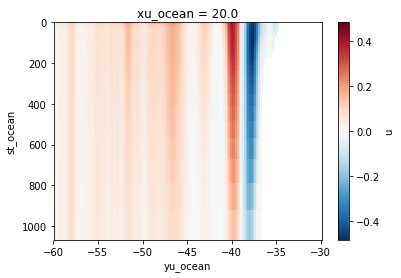

In [42]:
utrans.plot()
plt.gca().invert_yaxis()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


(-45, -30.023457876075213)

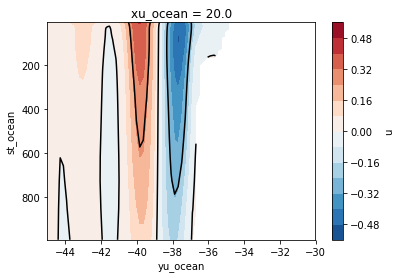

In [43]:
#plt.contour(utrans,15,colors='k',linewidth=0.25)
utrans.plot.contourf(levels=15)
utrans.plot.contour(levels=5,colors='k',linewidth=0.1)
plt.gca().invert_yaxis()
plt.xlim(xmin=-45)

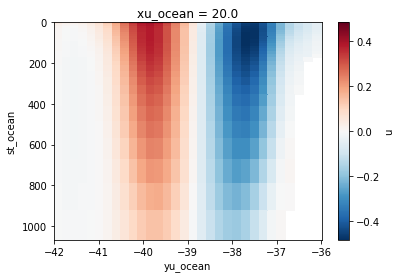

In [44]:
utrans = u.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yu_ocean=slice(-42,-36)).sel(xu_ocean=20)
utrans.plot()
plt.gca().invert_yaxis()

## 2. plot density distribution

In [10]:
rho=get_nc_variable(expt,'ocean.nc','pot_rho_0', time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]


In [11]:
rhotrans = rho.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yt_ocean=slice(-60,-30)).isel(xt_ocean=1200)

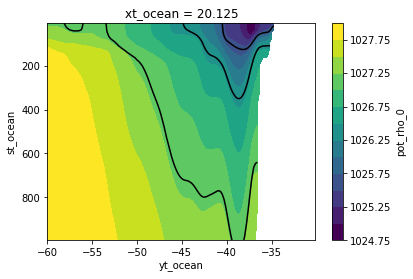

In [47]:
rhotrans.plot.contourf(levels=15)
rhotrans.plot.contour(levels=5,colors='k',linewidth=0.1)
plt.gca().invert_yaxis()

## 3. Salinity

In [8]:
salt=get_nc_variable(expt,'ocean.nc','salt', time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]


In [9]:
salttrans = salt.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yt_ocean=slice(-60,-30)).isel(xt_ocean=1200)

In [ ]:
salttrans.plot.contourf(levels=15)
salttrans.plot.contour(levels=15,colors='k',linewidth=0.1)
plt.gca().invert_yaxis()

## 4. Temperature

In [52]:
temp=get_nc_variable(expt,'ocean.nc','temp', time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xt_ocean') [1, 10, 216, 288]


In [53]:
temptrans = temp.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yt_ocean=slice(-60,-30)).isel(xt_ocean=1200)

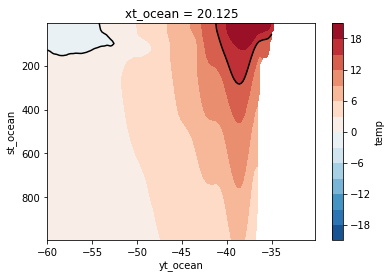

In [54]:
temptrans.plot.contourf(levels=15)
temptrans.plot.contour(levels=5,colors='k',linewidth=0.1)
plt.gca().invert_yaxis()

## 5. The transport in x direction

In [55]:
tx_trans_rho=get_nc_variable(expt,'ocean.nc','tx_trans_rho', time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'potrho', 'grid_yt_ocean', 'grid_xu_ocean') [1, 14, 216, 288]


In [56]:
tx_trans_rhos= tx_trans_rho.mean(dim='time').sel(grid_yt_ocean=slice(-60,-30)).isel(grid_xu_ocean=1200)

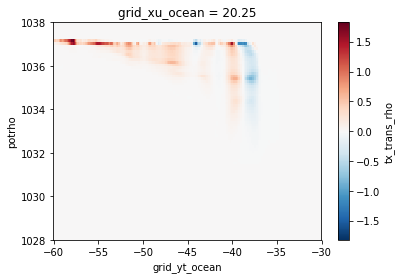

In [57]:
tx_trans_rhos.plot()
#plt.gca().invert_yaxis()

## 6. Plot the density and velocity together

(-45, -36.094494592009454)

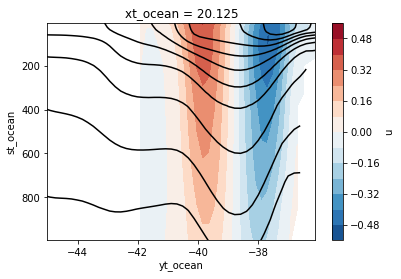

In [58]:
utrans.plot.contourf(levels=15)
rhotrans.plot.contour(levels=15,colors='k',linewidth=0.1)
plt.gca().invert_yaxis()
plt.xlim(xmin=-45)

## 7. Velocity and salinity

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


(-45, -30.023457876075213)

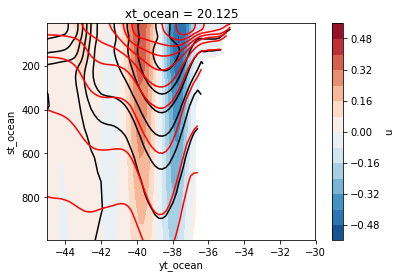

In [12]:
utrans.plot.contourf(levels=15)
salttrans.plot.contour(levels=15,colors='k',linewidth=0.1)
rhotrans.plot.contour(levels=15,colors='r',linewidth=0.1)
plt.gca().invert_yaxis()
plt.xlim(xmin=-45)

## 8. Velocity and temperature

(-45, -36.094494592009454)

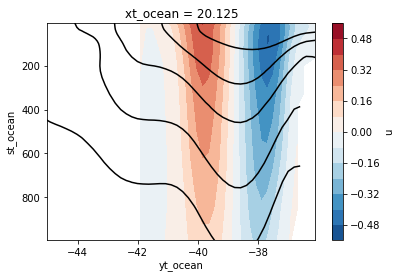

In [60]:
utrans.plot.contourf(levels=15)
temptrans.plot.contour(levels=15,colors='k',linewidth=0.1)
plt.gca().invert_yaxis()
plt.xlim(xmin=-45)

## 9. Agulhas Transport

## 10. Transport

In [4]:
tx_trans=get_nc_variable(expt,'ocean.nc','tx_trans', time_units='days since 1900-01-01')

Using 100 ncfiles
chunking info ('time', 'st_ocean', 'yt_ocean', 'xu_ocean') [1, 10, 216, 288]


In [5]:
tx_trans_A=tx_trans.sel(st_ocean=slice(0,1000)).mean(dim='time').sel(yt_ocean=slice(-60,-30)).isel(xu_ocean=1200)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


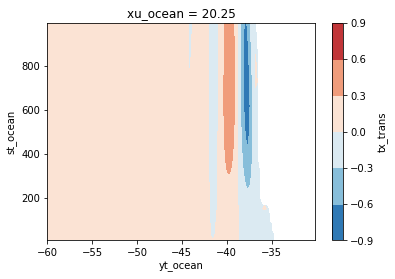

In [6]:
tx_trans_A.plot.contourf()

NameError: name 'salttrans' is not defined

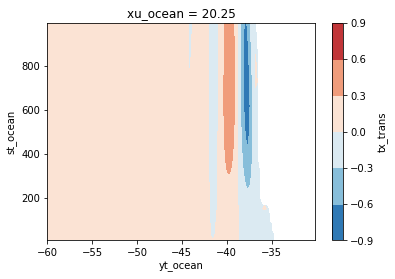

In [7]:
tx_trans_A.plot.contourf()
salttrans.plot.contour(levels=15,colors='k',linewidth=0.1)
plt.gca().invert_yaxis()

In [17]:
tx_trans_A

<xarray.DataArray 'tx_trans' (st_ocean: 28, yt_ocean: 176)>
dask.array<getitem, shape=(28, 176), dtype=float64, chunksize=(10, 20)>
Coordinates:
  * yt_ocean  (yt_ocean) float64 -59.96 -59.83 -59.71 -59.58 -59.46 -59.33 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...
    xu_ocean  float64 20.25

In [18]:
salttrans

<xarray.DataArray 'salt' (st_ocean: 28, yt_ocean: 176)>
dask.array<getitem, shape=(28, 176), dtype=float64, chunksize=(10, 20)>
Coordinates:
    xt_ocean  float64 20.12
  * yt_ocean  (yt_ocean) float64 -59.96 -59.83 -59.71 -59.58 -59.46 -59.33 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...

In [ ]:
tmp = tx_trans_A[salttrans>35.0]

In [ ]:
temp = tx_trans_A.sum(dim='st_ocean')

In [ ]:
temp.plot()

In [ ]:
temp2 = np.cumsum(temp)

In [ ]:
temp2.plot()

In [ ]:
print(temp.values)

## Transport above s=34

In [135]:
tx_trans1 = tx_trans\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()

In [25]:
tx_trans1

<xarray.DataArray 'tx_trans' (st_ocean: 50, yt_ocean: 25)>
array([[  7.631627e-03,   5.896116e-03,   6.636019e-03, ...,  -1.040479e-01,
         -9.984580e-02,  -8.486481e-02],
       [  3.035541e-03,   1.363249e-03,   2.153031e-03, ...,  -1.067908e-01,
         -1.022398e-01,  -8.686719e-02],
       [  1.550958e-03,  -7.140883e-05,   7.217866e-04, ...,  -1.085411e-01,
         -1.036772e-01,  -8.788453e-02],
       ..., 
       [  1.181183e-02,   3.932937e-03,   4.925049e-03, ...,            nan,
                   nan,            nan],
       [           nan,            nan,            nan, ...,            nan,
                   nan,            nan],
       [           nan,            nan,            nan, ...,            nan,
                   nan,            nan]])
Coordinates:
  * yt_ocean  (yt_ocean) float64 -41.82 -41.64 -41.45 -41.26 -41.07 -40.89 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...
    xu_ocean  float64 20.0

In [33]:
salt1 = salt\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()

In [34]:
salt1

<xarray.DataArray 'salt' (st_ocean: 50, yt_ocean: 25)>
array([[ 34.886534,  34.909456,  34.927912, ...,  35.350451,  35.329097,
         35.309433],
       [ 34.886831,  34.909677,  34.928071, ...,  35.350179,  35.328857,
         35.309178],
       [ 34.886578,  34.909047,  34.927074, ...,  35.349855,  35.328427,
         35.308557],
       ..., 
       [ 34.707449,  34.707949,  34.708825, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
    xt_ocean  float64 20.12
  * yt_ocean  (yt_ocean) float64 -41.82 -41.64 -41.45 -41.26 -41.07 -40.89 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...

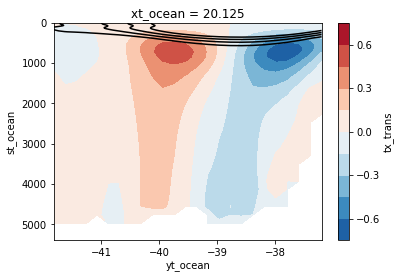

In [70]:
tx_trans1.plot.contourf(levels=15)
salt1.plot.contour(levels=np.arange(34.9, 35.2, 0.1), colors='k')
plt.gca().invert_yaxis()

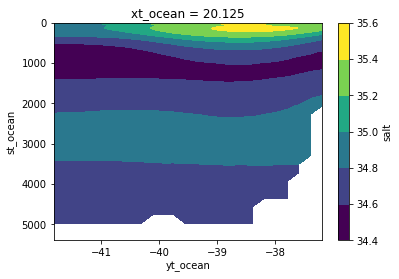

In [73]:
salt1.plot.contourf()
plt.gca().invert_yaxis()

In [26]:
salttrans

<xarray.DataArray 'salt' (st_ocean: 28, yt_ocean: 176)>
array([[ 33.874597,  33.876501,  33.878528, ...,        nan,        nan,
               nan],
       [ 33.882173,  33.884595,  33.887086, ...,        nan,        nan,
               nan],
       [ 33.905962,  33.908554,  33.910857, ...,        nan,        nan,
               nan],
       ..., 
       [ 34.673153,  34.6731  ,  34.673039, ...,        nan,        nan,
               nan],
       [ 34.672654,  34.672612,  34.672567, ...,        nan,        nan,
               nan],
       [ 34.671825,  34.671785,  34.671746, ...,        nan,        nan,
               nan]])
Coordinates:
    xt_ocean  float64 20.12
  * yt_ocean  (yt_ocean) float64 -59.96 -59.83 -59.71 -59.58 -59.46 -59.33 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...

In [136]:
rho1 = rho\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100)).mean(dim='time')\
                .compute()

Choose a potential density contour.

(1000, 0)

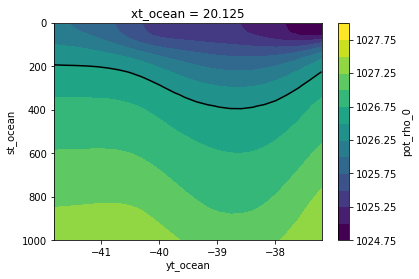

In [82]:
rho1.plot.contourf(levels=15)
rho1.plot.contour(levels=[1026.5], colors='k')
plt.gca().invert_yaxis()
plt.ylim(1000, 0)

(2000, 0)

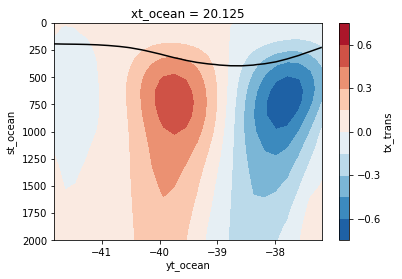

In [147]:
tx_trans1.plot.contourf(levels=15)
rho1.plot.contour(levels=[1026.5], colors='k')
plt.gca().invert_yaxis()
plt.ylim(2000, 0)

(2000, 0)

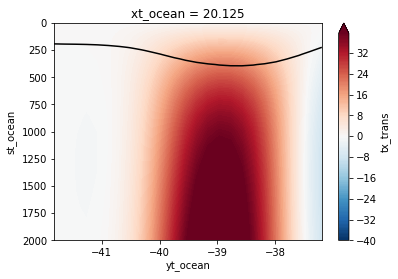

In [146]:
(tx_trans1.cumsum('yt_ocean').cumsum('st_ocean')).plot.contourf(levels=np.arange(-40, 40, 0.5))
rho1.plot.contour(levels=[1026.5], colors='k')
plt.gca().invert_yaxis()
plt.ylim(2000, 0)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less
  if not reflexive


(1000, 0)

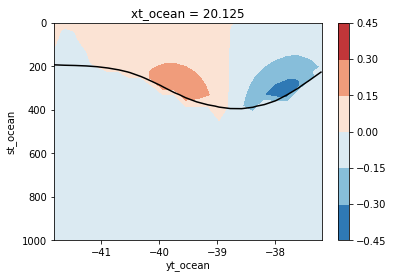

In [139]:
mask = (rho1 < 1026.5)
(tx_trans1 * mask).plot.contourf()
rho1.plot.contour(levels=[1026.5], colors='k')
plt.ylim(1000, 0)

(1000, 0)

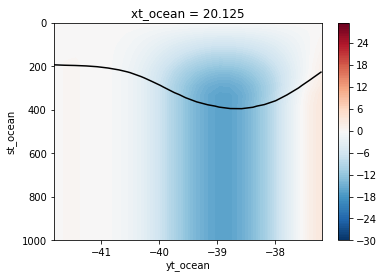

In [150]:
(tx_trans1 * mask *-1).cumsum('yt_ocean').cumsum('st_ocean').plot.contourf(levels=np.arange(-30, 30, 0.5))
rho1.plot.contour(levels=[1026.5], colors='k')
plt.gca().invert_yaxis()
plt.ylim(1000, 0)

(1000, 0)

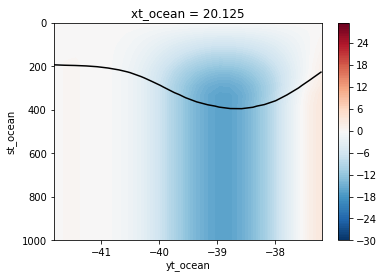

In [152]:
al_trans=(tx_trans1 * mask *-1).cumsum('yt_ocean').cumsum('st_ocean')
al_trans.plot.contourf(levels=np.arange(-30, 30, 0.5))
rho1.plot.contour(levels=[1026.5], colors='k')
plt.gca().invert_yaxis()
plt.ylim(1000, 0)

## Transport above $\rho = 1026.5$ as a timeseries

In [158]:
rho1 = rho\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xt_ocean=20, method='nearest')\
                .isel(time=slice(None,100))\
                .compute()

In [159]:
tx_trans1 = tx_trans\
                .sel(yt_ocean=slice(-42, -37))\
                .sel(xu_ocean=20)\
                .isel(time=slice(None,100))\
                .compute()

In [160]:
mask = (rho1 <= 1026.5)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/xarray/core/variable.py:1164: RuntimeWarning: invalid value encountered in less_equal
  if not reflexive


In [155]:
mask

<xarray.DataArray 'pot_rho_0' (st_ocean: 50, yt_ocean: 25)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)
Coordinates:
    xt_ocean  float64 20.12
  * yt_ocean  (yt_ocean) float64 -41.82 -41.64 -41.45 -41.26 -41.07 -40.89 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...

In [161]:
al_trans = (tx_trans1 * mask).cumsum('yt_ocean').cumsum('st_ocean')

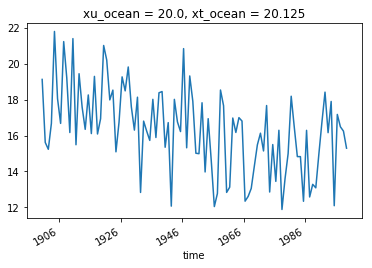

In [162]:
al_trans.max('yt_ocean').max('st_ocean').plot.line()
#plt.xlim(1000,0)


In [ ]:
tx_trans1.plot.line()

## Transport view from surface

(3000, 0)

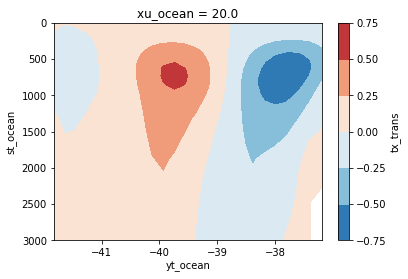

In [131]:
tx_trans1.mean('time').plot.contourf()
plt.ylim(3000,0)